In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

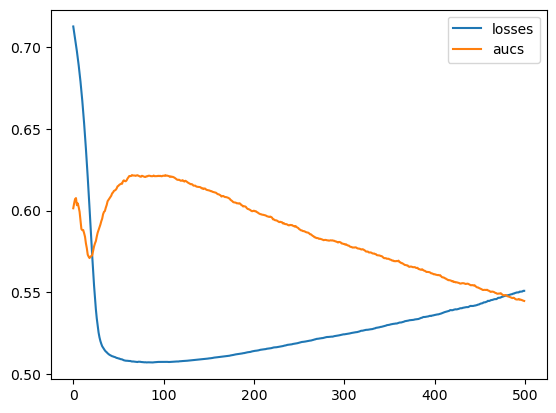

In [3]:
losses=[0.7125670397043907, 0.7088902706434245, 0.7052057674128106, 0.7014457802487235, 0.6974549473520697, 0.6933026770580868, 0.6888040696453844, 0.6839084283918397, 0.6788299995609838, 0.6731872916900874, 0.6670929305573814, 0.6604866973015657, 0.6533691981579164, 0.6458541786568797, 0.6377808922036761, 0.6293357814479078, 0.6203745809036103, 0.6111422530945889, 0.601546210101527, 0.5914704901540381, 0.5815471319051889, 0.5720241253192608, 0.5628188768682996, 0.5542308119287518, 0.5465961616603058, 0.5397704454229089, 0.5341517161100339, 0.5295561985072926, 0.5255114232373034, 0.5225522468911956, 0.5203039708979789, 0.5185793971064424, 0.5171114427072031, 0.5161986765358862, 0.5153677302208381, 0.5145246828043902, 0.5138780641080307, 0.5134144766717894, 0.5127896671621208, 0.5123512391690854, 0.5118902230534459, 0.5116014047565624, 0.5112799980022289, 0.5110037703799386, 0.5108577987746975, 0.5106327939576912, 0.5104980754037188, 0.510219588918224, 0.5099430422157983, 0.5098672296926167, 0.509611130779625, 0.5095589407149204, 0.5092596506800746, 0.5091318591707452, 0.5090540861472105, 0.5087913425899299, 0.5085150648725678, 0.5083898187023282, 0.5082639355605144, 0.5082584948960872, 0.5082044725404505, 0.508139954163478, 0.5080807197127927, 0.5080798607945782, 0.5078913297748294, 0.507746881569213, 0.5077984080015764, 0.5077421913119803, 0.5076983762942149, 0.5075683928283191, 0.5075207041878985, 0.507445622543324, 0.5076203424366791, 0.5076407321497926, 0.5076063395905019, 0.5074788381231476, 0.5074256760442358, 0.5073818513470837, 0.5073761236973298, 0.5072649532233887, 0.507306838816727, 0.50720388597233, 0.5072625997738961, 0.5072732070232728, 0.5072511274930079, 0.5072311235968544, 0.5072346114025497, 0.5071690704068567, 0.5071888591489221, 0.5072666775127421, 0.5073260580032979, 0.5073362845301288, 0.5074045506977288, 0.5074647196337708, 0.5075025619604648, 0.5075098549538528, 0.5074848962305618, 0.5075057614223231, 0.5075636395701656, 0.5075699967196864, 0.5076125328697031, 0.5075298104530725, 0.507519592247118, 0.5075733556367054, 0.5075382367837803, 0.5074922780365686, 0.5074571464476083, 0.5075257732997253, 0.5075278509716024, 0.507566100002354, 0.5075788956422073, 0.5076992830999216, 0.5076318763599776, 0.507661770212005, 0.5077917231114162, 0.5077854386422029, 0.5077466059614111, 0.5078552613231192, 0.507925683616573, 0.5079380487784361, 0.5080217192655275, 0.5080464241171834, 0.5080704896198718, 0.5080889599275725, 0.5081382473649463, 0.5081761355413671, 0.5082322849846973, 0.5082877439651055, 0.5082976011469154, 0.5083637437929115, 0.5084099075053832, 0.5084960800290448, 0.50854888770655, 0.5086022229955407, 0.5087109595282465, 0.508776754905016, 0.5088457920272805, 0.5088898733130887, 0.5089432439233503, 0.5089729036021436, 0.5090419373281321, 0.5090828252653791, 0.5091130108575196, 0.5091539541540662, 0.5092291069506241, 0.5092518341507327, 0.5093147915992302, 0.5093800641193009, 0.5094968094105734, 0.5095492687999693, 0.5096500223858065, 0.5096778270186182, 0.5097625995972896, 0.5098252999476898, 0.509922308799548, 0.5100566323666151, 0.5101528806224508, 0.5101941825657489, 0.510279902535626, 0.5103439598681241, 0.5104129606502348, 0.5104701845054953, 0.5105105546804575, 0.5105765090029464, 0.5106768657339265, 0.5107161565723582, 0.5108166308144898, 0.5108775316480219, 0.5109399117295899, 0.5110360057944925, 0.5110518689508792, 0.5111638526631217, 0.5112460243735898, 0.5113047295146518, 0.5114658013028637, 0.5115469858856962, 0.5116474163158666, 0.5117649741661854, 0.5119042822778055, 0.5120468380784038, 0.5121306670017731, 0.512210577811271, 0.512295894982808, 0.5123546801061711, 0.5123864706085618, 0.5124801465249129, 0.5126115139733013, 0.5127041764408774, 0.5128502215754952, 0.5128984914885627, 0.5130302758298368, 0.5131945372307063, 0.5132964932680809, 0.513409576015255, 0.5134687545971993, 0.513528494074134, 0.5136330664327681, 0.5138200373731108, 0.5139636382078513, 0.5140769653170877, 0.5141439028614946, 0.5142816756865238, 0.5143236191863687, 0.5144078402098088, 0.5144989628058213, 0.5145898563230139, 0.5147732007197845, 0.514910953506785, 0.5150015646236235, 0.515059299788244, 0.5151828094425365, 0.5152339548127264, 0.5152978851245, 0.5153471231460571, 0.5155420931655796, 0.515614988797071, 0.5156329095873058, 0.5156965648007189, 0.5157801962306356, 0.5159206505854246, 0.5160925498715153, 0.5163176795016666, 0.5163731077457765, 0.5163927057869414, 0.5164009791154128, 0.5164977510770162, 0.5165936790640198, 0.516710891173436, 0.5168288336520181, 0.516910017046154, 0.5170079646287141, 0.5170968886454221, 0.5172017330457682, 0.5173808691168782, 0.5175220791430895, 0.517589311484258, 0.5177862370795334, 0.5179345105108712, 0.5180087554828394, 0.5180638941944155, 0.5181640632811435, 0.5182392367949853, 0.5182878651849905, 0.518481137236299, 0.5185969077963435, 0.5186675501684858, 0.5187548166326648, 0.5188166516119259, 0.5189458199715682, 0.5190948667349639, 0.5192733646458031, 0.5194275564277954, 0.5195764968877504, 0.5197127245769881, 0.5197536252502702, 0.5198252578066964, 0.5199436688015604, 0.5199979360287006, 0.5201074827430595, 0.5201730028516547, 0.5203090485004958, 0.5204527072417431, 0.5205358509664182, 0.5205848976078197, 0.5207250605621229, 0.5209207127236912, 0.5210436101992246, 0.5212343433643678, 0.5213364293093016, 0.5215631237736454, 0.5216278805691972, 0.5217043686116862, 0.5217599096121611, 0.5218910264153765, 0.521932923895681, 0.5220586769601219, 0.5220780623944057, 0.5222313843901001, 0.5223386432030941, 0.5225827160723868, 0.522657837623205, 0.5227530467883814, 0.5227527985206017, 0.5228241466389083, 0.5228709785686938, 0.5229304368339712, 0.5229747692743937, 0.5229530038996639, 0.523148677797399, 0.5232768794070621, 0.5233580458198178, 0.5233913707597303, 0.5235103455364195, 0.5236324975293586, 0.5237361899128666, 0.5238725560003537, 0.5240443106050845, 0.5241406210127719, 0.5242590578193338, 0.5243694943580193, 0.5243730786179546, 0.5244661769975624, 0.5245269591312463, 0.524638320985343, 0.5247825854524248, 0.5248729603582638, 0.5249375633025102, 0.5251037551466896, 0.5252098174516292, 0.5253119854166297, 0.5253893328867747, 0.5254669276058165, 0.5256334358131104, 0.5256983445920156, 0.5257335578614151, 0.5258914295085135, 0.5259824619333968, 0.5261924957957362, 0.5264527687320003, 0.5265799618174887, 0.5265881096535598, 0.5267143370079519, 0.5268130312618028, 0.5269295233606952, 0.5271169633267612, 0.5271320275092057, 0.5271763169867361, 0.52728869551607, 0.5274037037819539, 0.5274545866200048, 0.527512297161624, 0.5275876238475158, 0.527776266434933, 0.5279432997065052, 0.5280475460226379, 0.528327682079413, 0.5284420829213243, 0.528504667288897, 0.5285998769635148, 0.5287109778137968, 0.528909313882518, 0.5289547119045529, 0.5290983894951323, 0.5292900318433756, 0.5294528212982026, 0.5295793566948328, 0.5297046071104174, 0.5299647873283452, 0.5300377610741858, 0.5301258069837195, 0.530223986701748, 0.5304210303176162, 0.5305424575452451, 0.5306521637147648, 0.5307572584206562, 0.5308088317216292, 0.5308947291469303, 0.5310093324068944, 0.5309778959662826, 0.5311544897549513, 0.5313201400629136, 0.5315676124347242, 0.5315710526925547, 0.53163798123683, 0.5317858117937702, 0.531938020150546, 0.5321331324740353, 0.5323996372372336, 0.5324957048111831, 0.5325805704478185, 0.5327337479319667, 0.5327901269635583, 0.5329803051771941, 0.5330276063025168, 0.5330976587415082, 0.533143683546289, 0.5331985981036456, 0.5332869109604773, 0.5334634364839972, 0.5335433905960149, 0.5336582895018097, 0.5336800451971527, 0.5337532580408275, 0.5339973828731439, 0.5342696407581666, 0.5344341595967611, 0.5345521650762639, 0.5348588662949043, 0.5350005698000264, 0.53496819360983, 0.5350844116292448, 0.5352234003211018, 0.535268660454329, 0.5353515143068428, 0.5355787620245561, 0.535730624130988, 0.5355671503265359, 0.5358449320847493, 0.5359151762435239, 0.5360886604018361, 0.5361994673044254, 0.5363310475295086, 0.5364318033229252, 0.5365500195413573, 0.5365737033026171, 0.5367849190690239, 0.5369241259716175, 0.5370684863834979, 0.5372946625761157, 0.5374970166092246, 0.5377316415479719, 0.5379556454824247, 0.5381218816480066, 0.5382655045585415, 0.5384145557370961, 0.538644443719815, 0.5387368864483304, 0.5391628207304539, 0.5391894910070631, 0.5390937051542124, 0.539166454236392, 0.5394075197032374, 0.5395470412708075, 0.5396836870416277, 0.5396189317744002, 0.5397055021718017, 0.5398608549707635, 0.5400273592723401, 0.5402733634340118, 0.5403459895709981, 0.5403273742423098, 0.5405706338733011, 0.5406738380421261, 0.5408351329656748, 0.5409081194475506, 0.5409990287574268, 0.5410116345454485, 0.5410176605580539, 0.5413021377348832, 0.5416133218681031, 0.5417744320342344, 0.5416749975620172, 0.5417118845162568, 0.5417618953604304, 0.5419349459841041, 0.5420024111399963, 0.5421582743992494, 0.5423143439822726, 0.5425622140580093, 0.5426309137602477, 0.5429660409604042, 0.5431836435937474, 0.5433025601243022, 0.5434199547835564, 0.5438581287351429, 0.5438917865101088, 0.5439875428153579, 0.5442168822994938, 0.544460910847384, 0.544888925008964, 0.5447307938863749, 0.5449177069202108, 0.5452416028052653, 0.5453203824850229, 0.5454477197424299, 0.5456329500912941, 0.5458509424473146, 0.5459105701867671, 0.5458762343452866, 0.5461605963883577, 0.5466151273148692, 0.5467232090455515, 0.5467479179727386, 0.5468485020844006, 0.5472652361943171, 0.5473340989178063, 0.5475852988724016, 0.5477764764402666, 0.5479463143566056, 0.5480281810814839, 0.5481911681995773, 0.5482644202702406, 0.5484200787340474, 0.5486073188292675, 0.5486774609299467, 0.5488925664513199, 0.5489701244905804, 0.5493371109677176, 0.5493354233581456, 0.5496738581915527, 0.5498032569885254, 0.5500044403252778, 0.5499743235077273, 0.5500361472792775, 0.5504784409137193, 0.5504396255539353, 0.550535767845958, 0.5505857990677879, 0.5509840990403438, 0.5509735060553266]
aucs=[0.6014354066985647, 0.6045454545454545, 0.6070813397129187, 0.6076555023923446, 0.6033014354066986, 0.604401913875598, 0.6021052631578948, 0.5992822966507177, 0.5939234449760765, 0.588755980861244, 0.5880861244019139, 0.588133971291866, 0.5862200956937799, 0.5840191387559808, 0.5799521531100479, 0.5770095693779903, 0.5730622009569378, 0.571866028708134, 0.5710047846889952, 0.571913875598086, 0.572200956937799, 0.5728708133971292, 0.5754545454545454, 0.5780861244019139, 0.5799521531100478, 0.5813397129186603, 0.5841148325358851, 0.5865071770334928, 0.5881818181818181, 0.5898564593301435, 0.5914354066985645, 0.5934928229665071, 0.5950717703349282, 0.597799043062201, 0.5992344497607656, 0.5997607655502392, 0.6018181818181818, 0.603444976076555, 0.6057416267942584, 0.606555023923445, 0.6072727272727273, 0.6082775119617225, 0.6090909090909091, 0.6105263157894737, 0.6111004784688995, 0.6120574162679425, 0.6123444976076555, 0.6127272727272727, 0.6135406698564593, 0.6148325358851675, 0.6151674641148325, 0.6157894736842106, 0.6161244019138755, 0.6164593301435407, 0.6164114832535885, 0.6179425837320573, 0.6185167464114832, 0.6180861244019138, 0.6179425837320575, 0.6184688995215311, 0.6195693779904307, 0.6203827751196171, 0.6211483253588517, 0.6211004784688995, 0.6211961722488039, 0.6217224880382776, 0.6214832535885169, 0.6214354066985647, 0.6214354066985646, 0.621244019138756, 0.6214832535885167, 0.6216267942583732, 0.6213875598086125, 0.6211004784688995, 0.6208133971291866, 0.6207177033492822, 0.6212918660287081, 0.6210526315789474, 0.6208612440191387, 0.620622009569378, 0.6205741626794258, 0.6210047846889952, 0.620956937799043, 0.6212918660287081, 0.6213397129186603, 0.6212440191387559, 0.6210526315789473, 0.6210526315789473, 0.6210526315789474, 0.6214354066985646, 0.6210526315789474, 0.6210526315789473, 0.6211004784688995, 0.6211004784688996, 0.6212918660287081, 0.6211004784688996, 0.6212918660287081, 0.6211004784688995, 0.6210047846889952, 0.6212918660287081, 0.6213397129186603, 0.621244019138756, 0.6216746411483255, 0.6213397129186604, 0.6213875598086125, 0.6212440191387559, 0.6210526315789474, 0.6206220095693781, 0.6209090909090909, 0.6206220095693781, 0.6206698564593301, 0.6203827751196173, 0.6201435406698563, 0.619712918660287, 0.6193301435406697, 0.6188995215311004, 0.6188038277511961, 0.6188995215311005, 0.6185645933014353, 0.6182296650717704, 0.6183253588516746, 0.6186124401913874, 0.618133971291866, 0.6177511961722487, 0.6182296650717704, 0.6179425837320573, 0.617511961722488, 0.6170813397129186, 0.6167942583732057, 0.6164593301435407, 0.6161244019138756, 0.6162200956937799, 0.6158851674641148, 0.6152631578947368, 0.6152631578947368, 0.6152631578947368, 0.6147846889952153, 0.6145933014354067, 0.6144976076555024, 0.6144497607655504, 0.6144019138755981, 0.6142105263157894, 0.6136363636363636, 0.6137320574162679, 0.6132057416267943, 0.6135406698564593, 0.6134449760765551, 0.6128708133971292, 0.6126315789473684, 0.612488038277512, 0.6123923444976076, 0.6122488038277512, 0.6119138755980861, 0.6119138755980862, 0.6115311004784689, 0.6113875598086124, 0.6112918660287081, 0.6111004784688995, 0.610909090909091, 0.6104306220095693, 0.6100478468899521, 0.6099521531100479, 0.609665071770335, 0.6093301435406699, 0.6086124401913876, 0.6088516746411483, 0.6089473684210527, 0.6085645933014355, 0.6082775119617225, 0.6082775119617225, 0.6080861244019139, 0.6079425837320575, 0.6076076555023924, 0.6073205741626795, 0.6066028708133971, 0.6061722488038278, 0.6057894736842105, 0.6052153110047848, 0.605023923444976, 0.604976076555024, 0.6048325358851675, 0.6044497607655503, 0.6044976076555024, 0.6043062200956939, 0.6044976076555024, 0.6041148325358852, 0.6033971291866029, 0.6031578947368421, 0.6025358851674641, 0.6026794258373206, 0.6025837320574162, 0.6022966507177034, 0.6015311004784688, 0.6010526315789475, 0.600909090909091, 0.6006220095693781, 0.6003349282296652, 0.5998564593301435, 0.5996172248803828, 0.5997607655502393, 0.5999521531100478, 0.5996172248803828, 0.599665071770335, 0.5991387559808613, 0.5988995215311004, 0.598421052631579, 0.598133971291866, 0.5978468899521532, 0.5977511961722488, 0.5975119617224879, 0.5974641148325359, 0.5973205741626795, 0.5972248803827752, 0.5970334928229666, 0.5966507177033493, 0.5964593301435407, 0.5962679425837321, 0.5961244019138756, 0.5963636363636364, 0.5960765550239234, 0.5956937799043063, 0.594688995215311, 0.5946411483253589, 0.5942105263157894, 0.594066985645933, 0.5940191387559809, 0.5936363636363637, 0.5933014354066987, 0.5929665071770335, 0.5932057416267943, 0.5929665071770336, 0.5929186602870813, 0.592153110047847, 0.5923444976076556, 0.591866028708134, 0.5917224880382775, 0.5917224880382775, 0.5914354066985645, 0.5910526315789474, 0.5910047846889952, 0.5912918660287082, 0.5911004784688996, 0.5911961722488039, 0.5907655502392345, 0.5905741626794259, 0.5902392344497609, 0.590574162679426, 0.5900000000000001, 0.5896650717703349, 0.5893301435406698, 0.5887081339712918, 0.5883732057416269, 0.5879425837320574, 0.5878947368421052, 0.5875119617224881, 0.5874641148325358, 0.5873205741626795, 0.5869856459330144, 0.5867464114832537, 0.5866507177033493, 0.586507177033493, 0.5861244019138757, 0.5855502392344498, 0.5855023923444977, 0.5850239234449761, 0.5845454545454546, 0.5843062200956938, 0.5836842105263158, 0.5836842105263158, 0.5832057416267943, 0.5832535885167465, 0.58311004784689, 0.5827272727272728, 0.582822966507177, 0.5826315789473685, 0.5824401913875599, 0.5822488038277511, 0.581913875598086, 0.5820574162679426, 0.5821052631578948, 0.5820095693779905, 0.5818181818181818, 0.5818181818181818, 0.5816267942583732, 0.5817703349282297, 0.581866028708134, 0.5817224880382775, 0.5818181818181818, 0.5815789473684211, 0.5815311004784689, 0.5811961722488038, 0.5811004784688996, 0.5808133971291866, 0.5805263157894737, 0.5808612440191387, 0.5807655502392345, 0.5805263157894738, 0.5799043062200957, 0.5799043062200958, 0.5796172248803828, 0.5796172248803828, 0.5791866028708135, 0.579377990430622, 0.5789473684210527, 0.5786602870813398, 0.5786124401913877, 0.5780861244019139, 0.5778468899521532, 0.5777511961722488, 0.5774162679425838, 0.5774641148325359, 0.5774162679425838, 0.5775598086124403, 0.5774641148325359, 0.5770813397129186, 0.5768421052631579, 0.5767464114832536, 0.5766985645933015, 0.5764114832535886, 0.5762200956937799, 0.5764114832535886, 0.57622009569378, 0.5758851674641149, 0.5755023923444976, 0.574976076555024, 0.5749760765550239, 0.574976076555024, 0.5744497607655503, 0.574401913875598, 0.5744497607655503, 0.5742583732057417, 0.5738755980861244, 0.573732057416268, 0.5737799043062201, 0.5734449760765551, 0.5733492822966507, 0.5727751196172249, 0.5726794258373207, 0.5726315789473685, 0.5725837320574162, 0.5722966507177034, 0.572200956937799, 0.5719138755980862, 0.5713397129186603, 0.570956937799043, 0.5709090909090909, 0.5709090909090909, 0.5705741626794258, 0.5705741626794258, 0.5705741626794258, 0.5701913875598086, 0.5700478468899521, 0.5698086124401914, 0.5694258373205742, 0.5694736842105262, 0.5690909090909091, 0.5691387559808612, 0.5690430622009569, 0.5692344497607655, 0.5690909090909091, 0.5694258373205742, 0.5685167464114833, 0.5684210526315789, 0.5678947368421052, 0.5678947368421052, 0.5675119617224881, 0.5671770334928229, 0.5667464114832536, 0.5667464114832536, 0.5665071770334928, 0.5665071770334928, 0.5658851674641148, 0.5655980861244019, 0.5657894736842104, 0.5657894736842105, 0.5655980861244019, 0.5654066985645932, 0.5654545454545454, 0.5654545454545454, 0.5650717703349282, 0.5649282296650718, 0.5650239234449761, 0.5643062200956939, 0.5642105263157895, 0.5639712918660288, 0.5638277511961722, 0.5641626794258373, 0.5637320574162679, 0.5633492822966507, 0.5632057416267943, 0.5628708133971293, 0.562488038277512, 0.5625358851674642, 0.5624401913875599, 0.5623923444976077, 0.562153110047847, 0.5616746411483253, 0.5616267942583733, 0.5613875598086125, 0.5610526315789474, 0.5611483253588517, 0.5608612440191388, 0.5607655502392345, 0.5605741626794258, 0.5606698564593302, 0.5604306220095694, 0.5605263157894738, 0.5599521531100479, 0.5593301435406698, 0.5591866028708135, 0.5591387559808613, 0.5587081339712918, 0.5585645933014354, 0.5580861244019139, 0.5578947368421052, 0.5574641148325359, 0.5575119617224881, 0.5573684210526316, 0.5572248803827752, 0.5567942583732058, 0.5569377990430622, 0.5563636363636364, 0.5565071770334928, 0.5561244019138756, 0.55622009569378, 0.5560765550239235, 0.5558851674641148, 0.5557416267942584, 0.5554066985645933, 0.5554066985645933, 0.5555980861244019, 0.555645933014354, 0.5555980861244019, 0.5554545454545454, 0.5551674641148326, 0.5552153110047847, 0.5553588516746412, 0.5552631578947368, 0.5549760765550239, 0.5546411483253588, 0.5543540669856459, 0.5544497607655502, 0.5544497607655502, 0.5542105263157894, 0.554401913875598, 0.5538755980861244, 0.5533971291866028, 0.5530622009569377, 0.5530143540669856, 0.5526794258373205, 0.5524401913875598, 0.5522488038277511, 0.5519138755980861, 0.551531100478469, 0.5514832535885167, 0.551578947368421, 0.5515311004784689, 0.5514832535885167, 0.5516267942583731, 0.5511961722488038, 0.5510047846889953, 0.5506698564593302, 0.5502870813397129, 0.5504784688995216, 0.5504784688995215, 0.5503349282296651, 0.5500956937799043, 0.549712918660287, 0.5495693779904306, 0.5492344497607655, 0.5491866028708133, 0.5493301435406698, 0.5492822966507177, 0.5495215311004784, 0.549043062200957, 0.5485645933014355, 0.5481818181818182, 0.5482775119617225, 0.5483732057416268, 0.5483253588516748, 0.5477511961722488, 0.5476076555023923, 0.5474162679425838, 0.5472248803827752, 0.5469856459330144, 0.5467464114832535, 0.5465071770334928, 0.5467464114832536, 0.546555023923445, 0.5460287081339713, 0.5457416267942584, 0.545645933014354, 0.5456937799043062, 0.5459808612440191, 0.5455023923444976, 0.545645933014354, 0.5453588516746412, 0.5452153110047847, 0.5449282296650718, 0.5447846889952153]
plt.plot(range(len(losses)), losses, label='losses')
plt.plot(range(len(aucs)), aucs, label='aucs')
plt.legend()

In [8]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from itertools import product
from src.utils import flatten_product
lrs = [1e-5, 5e-5, 1e-4]
nhs = [10, 20, 30, 40]
nls = [1, 2, 3, 4]
conditions = product(lrs, product(nhs, product(nls)))
conditions = list(list(flatten_product(x)) for x in conditions)


In [10]:
pd.DataFrame(conditions)

,0,1,2
0,0.00001,10,1
1,0.00001,10,2
2,0.00001,10,3
3,0.00001,10,4
4,0.00001,20,1
5,0.00001,20,2
6,0.00001,20,3
7,0.00001,20,4
8,0.00001,30,1
9,0.00001,30,2
